In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
from sklearn.model_selection import train_test_split

import pandas as pd

from utils.configuration import *

## Graph & Model Specifics

In [2]:
experiment_name = "create_configration_test"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory

In [3]:
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
DATA_PATH = EXPERIMENT_DIR # <----------- change to different source if needed
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [4]:
os.makedirs(EXPERIMENT_DIR,exist_ok=True)
# check if configration dict already exists if not create:
if os.path.exists(CONF_DICT_PATH):
    configuration_dict=load_configuration_dict(CONF_DICT_PATH)
    print(f"Loaded existing configuration from {CONF_DICT_PATH}")
else:
    configuration_dict=create_and_write_new_configuration_dict(experiment_name,CONF_DICT_PATH,EXPERIMENT_DIR,DATA_PATH,LOG_DIR)
    print(f"Created new configuration file at {CONF_DICT_PATH}")

Created new configuration file at /home/bule/TramDag/dev_experiment_logs/create_configration_test/configuration.json


## Encoding of Ordinal and Continuous Variables in TramDAG

In the **TramDAG framework**, nodes can act both as **predictors (X)** and as **targets (Y)**.  
The way a node is modelled depends on its data type:

- **Continuous variables** (`∈ ℝ`)  
  Always modelled the same way for neural networks (regression-style output).

- **Ordinal variables**  
  Can be modelled in different ways:
  - As **continuous inputs** (e.g. standardized integers, or raw integers from the dataset).
  - As **nominal/categorical inputs** (e.g. one-hot encoding).
---

### Example: Models for X4 and X5

The figure below shows an example where nodes `X1`–`X4` are **ordinal**, and `X5` is **continuous**:

- **Model X4**  
  - Inputs:  
    - `X2` is treated as continuous (40 classes).  
    - `X1` and `X3` are one-hot encoded.  
  - Target:  
    - `X4` is ordinal → trained with an ordinal loss.  

- **Model X5**  
  - Input:  
    - `X4` is treated as continuous.  
  - Target:  
    - `X5` is continuous → trained with a continuous loss.  

---

### Key Idea
- The **X-specification** controls how variables are **encoded as predictors**.  
- The **Y-specification** controls how variables are **encoded as targets** (i.e. which loss is applied).

---
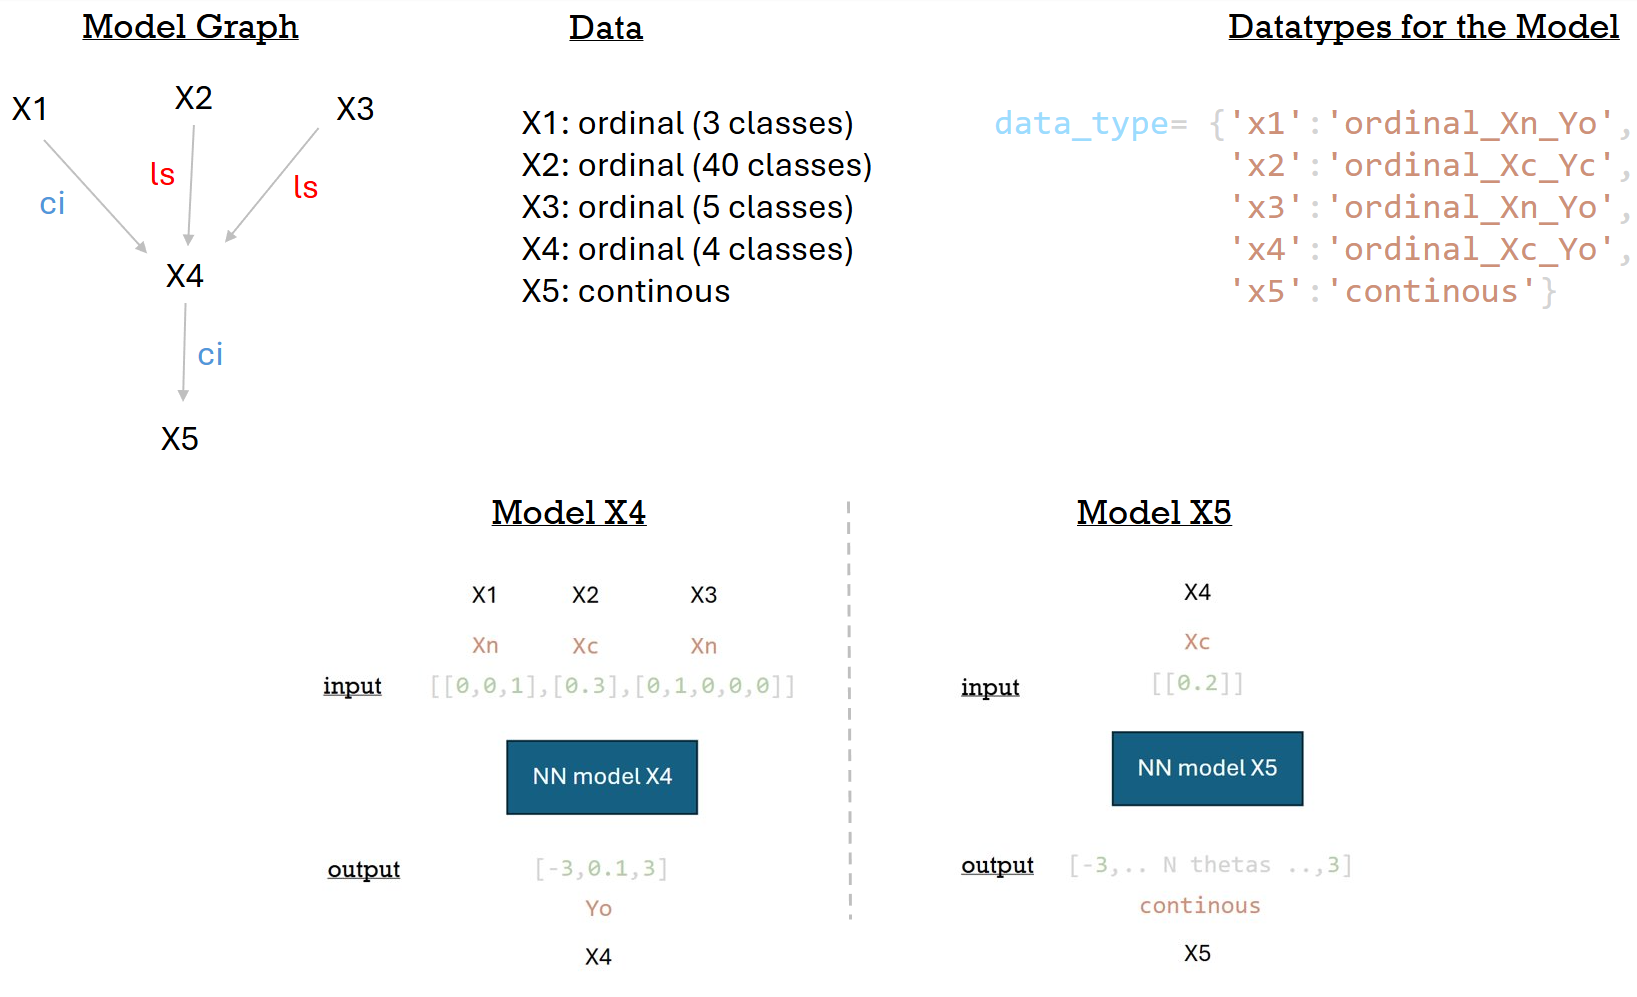

In [ ]:
# here you need to specify which varibles are in the graph and what type they are (continous or ordinal) for the model builder 
X:1'ordinal_Xn_Yc'
'ordinal_Xn_Yo'
'ordinal_Xc_Yc'
'ordinal_Xc_Yo'

data_type= {'x1':'ordinal_Xn_Yo',
            'x2':'ordinal_Xc_Yc',
            'x3':'ordinal_Xn_Yo',
            'x4':'ordinal_Xc_Yc',
            'x5':'continous'
            } 
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

Variable 'x1' is modeled as an ordinal   variable. As PREDICTOR: OneHot and TARGET: OneHot.
Variable 'x2' is modeled as an ordinal   variable. As PREDICTOR: continous and TARGET: continous.
Variable 'x3' is modeled as an ordinal   variable. As PREDICTOR: OneHot and TARGET: continous.
Variable 'x4' is modeled as a continuous variable. for target and predictor.
Configuration updated successfully.


In [ ]:
[[0,0,1],[0.3],[0,1,0,0,0]]

[-3,0.1,3]

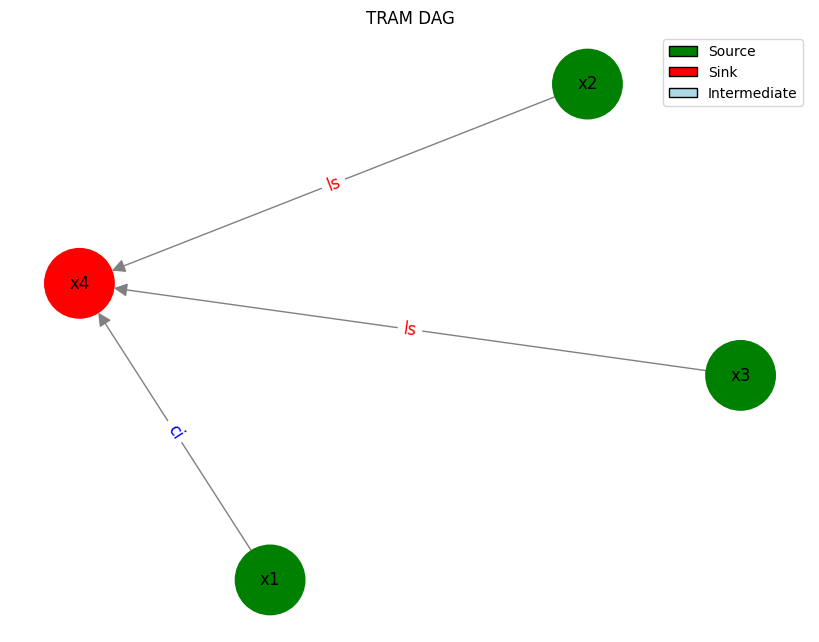

In [8]:
interactive_adj_matrix(CONF_DICT_PATH,seed=13)

In [ ]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

## Data Specific

In [ ]:

levels_dict=create_levels_dict(df,data_type)

write_nodes_information_to_configuration(CONF_DICT_PATH, min_vals, max_vals,levels_dict)
